# Project_3
## Clustering Regression Project


#### By Richard Macken & Lazaro Lopez 
***
---

# Project Description:
### For this project we will continue working with the zillow dataset. Using the 2017 properties and predictions data for single unit / single family homes.

### In addition to continuing work on our previous project, we have incorporated clustering methodologies on this project.

### Our audience for this project is a data science team. Our presentation will consist of a notebook demo of the discoveries made and illustrating the work we have done related to uncovering what the drivers of log error in the zestimate are.

### We documented code, processing (data acquistion, preparation, exploratory data analysis, and statistical testing, modeling, and model evaluation), findings, and reporting key takeaways in a Jupyter Notebook Final Report.

### Created modules (acquire.py, prepare.py) that make our process repeateable and our report (notebook) easier to read and follow.

### We asked exploratory questions of the data that helped us understand more about the attributes and drivers of log error. We also answer questions through charts and statistical tests.

### We constructed a model to predict log error of homes using clustering techniques.

### Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.

# Our Overall Goal for this Project is to Predict Logerror. 
---

# Project Planning: 
## a)Create deliverables:
### - README
### - final_report.ipynb
### - working_report.ipynb

## b) Build functional wrangle.py, explore.py, and model.py files

## c) Acquire the data from the Code Up SQL database via the wrangle.acquire functions

## d) Prepare and split the data via the wrangle.prepare functions

## e) Explore the data and define hypothesis. Run the appropriate statistical tests in order to accept or reject each null hypothesis. Document findings and takeaways.

## f) Create a baseline model in predicting log error .

## g) Fit and train regression models to predict log error on the train dataset.

## i) Evaluate the models by comparing the train and validation data.

## j) Select the best model and evaluate it on the train data.

## k) Develop and document all findings, takeaways, recommendations and next steps.

***
---

# Project Outline:
## Acquire data
## Prepare Data
## Explore Data
## Create Hypothesis
## Test Model 
## Conclusion
***
---

### Questions we will be asking:

Is there a correlation between square footage of a home and log error?

Is there a relationship between tax rate and log error?

Is Log error is significantly different among the counties of LA County, Orange County and Ventura County?

Does log error vary by the age of the house ?
***

# Acquire & Exploration Phase:
***
---

In [1]:
from final_exploration import *
from final_modeling import *


alpha=0.05
target='logerror'


random.seed(123)


In [2]:



partitionslist=partitionslist_with_scaled(scaled_vars = ['latitude', 'longitude', 'bathroomcnt', 'taxrate'])


We dropped 1765 rows


In [3]:

#Explore 

train_la=partitionslist[0][0]
orange_train=partitionslist[1][0]
ventura_train=partitionslist[2][0]


Question 1:

Is there a correlation between square footage of a home and log error?



In [4]:
pearsonsRsquareLogError(train_la,'structure_dollar_sqft_bin')


H_{0}

'There is zero correlation according to Pearson R '

Reject~H_{0}~?

Yes, we observe that structure_dollar_sqft_bin and logerror show observable correlation by pearsons R:
Our r value is:-0.037313842378546944
Hence, we reject our null hypothesis




Question 2:

Is there a relationship between tax rate and log error?


In [5]:
pearsonsRsquareLogError(train_la,'taxrate')


H_{0}

'There is zero correlation according to Pearson R '

Reject~H_{0}~?

Yes, we observe that taxrate and logerror show observable correlation by pearsons R:
Our r value is:0.020205900971801253
Hence, we reject our null hypothesis




Question 3:

Does log error vary by when the house was sold?

different 2-combos count:116
vs
same 2-combos count:1537 


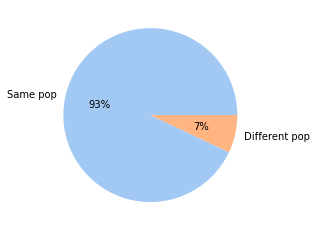

In [6]:
interestingcols=['age']
samepopdict,diffpopdict,lengthsame,lengthdiff=granulartwocombocomparison(train_la,interestingcols,target,n=100)



ageandlogrelpie(lengthsame,lengthdiff)

Since age is actually a categorical, we explored every unique age with a sample size of greater than 100.

(a conservative sample size to ensure our tests are significant).

 We ran the levene test then a ttest for indpendence respective to the levene test results. The net results give us a bit more detail than an ANOVA which would allow for deeper inspection.
 
 Considering an ANOVA only would answer if any of the samples differ, we can see that it is the case that our logerror overwhelmingly does not vary with age (in LA county).

Question 4,5,6:


Is Log error is significantly different among the counties of LA County, Orange County and Ventura County?

We actually ask three seperate questions here as we compare LA to OC, LA to Ventura and Ventura to OC.


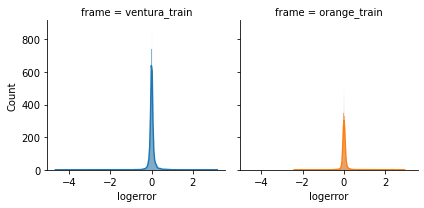

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

No, we observe that ventura_train and orange_train are statistically the same:
Hence, we fail to reject our null hypothesis




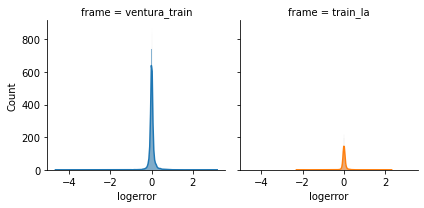

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

No, we observe that ventura_train and train_la are statistically the same:
Hence, we fail to reject our null hypothesis




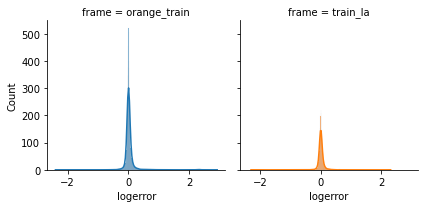

H_{0}

'The null hypothesis is that our populations are statistically the same.'

Reject~H_{0}~?

Yes, we observe that orange_train and train_la are statistically different
Hence, we reject our null hypothesis




In [7]:
threeQandA_stats_viz_counties(train_la,orange_train,ventura_train)
    

We see that LA and OC come from statistically different populations. However Ventura is not indepedent of LA or OC. 

It should be noted that the sizes of these subpopulations differ by a large degree. As we represent with the pie chart below.

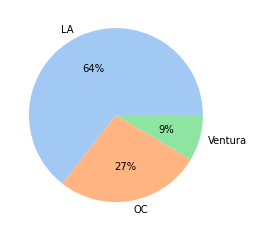

In [19]:
county_train_pie(train_la,orange_train,ventura_train)

In [20]:
X=partitionslist[0][1:4]

train=partitionslist[0][0]

In [21]:






# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)





# Modeling Phase:
***
---

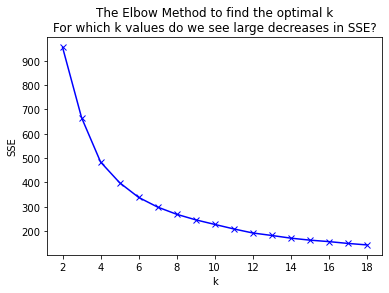

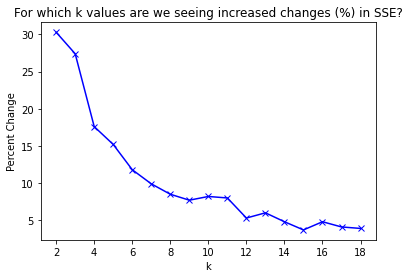

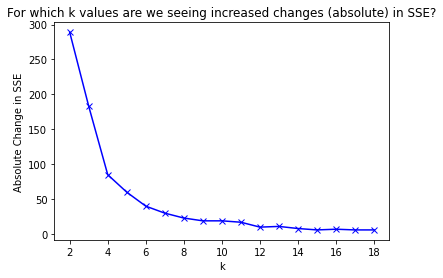

In [22]:


find_k(X[0], cluster_vars, k_range)



k = 5
# as reminders: 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'

kmeans = create_clusters(X[0], k, cluster_vars)





It appears that k such that k equals 6,7 or 8 is my best  fit.

I am not sure how to obtain that k....

In [23]:

centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)
centroid_df


,area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_age_bin
0,0,0.374394,0.539382,0.441321
1,1,0.493545,0.499519,0.622766
2,2,0.592451,0.326064,0.376646
3,3,0.872779,0.617564,0.236948
4,4,0.486534,0.780624,0.395415


In [24]:




X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df,X)


In [25]:

pd.DataFrame(X[0].groupby(['area_cluster', 'centroid_scaled_latitude', 'centroid_scaled_longitude', 
                           'centroid_age_bin'])['area_cluster'].count())




,,,,area_cluster
area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_age_bin,
0,0.374394,0.539382,0.441321,4501
1,0.493545,0.499519,0.622766,3833
2,0.592451,0.326064,0.376646,4645
3,0.872779,0.617564,0.236948,2018
4,0.486534,0.780624,0.395415,3296


In [26]:

cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)



In [27]:
X[0][cluster_vars].isna().sum()

scaled_bathroomcnt    0
sqft_bin              0
acres_bin             0
bath_bed_ratio        0
dtype: int64

In [28]:


k=7
cluster_name = 'size_cluster'
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df,X)







X_train = X[0].iloc[:,0:27]

xtrainlist=X_train.columns.to_list()
# xtrainlist


In [29]:


pd.DataFrame(X_train[X_train.size_cluster==6].groupby(['size_cluster', 'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
                              'centroid_acres_bin', 'centroid_bath_bed_ratio'])['size_cluster'].count())



,,,,,size_cluster
size_cluster,centroid_scaled_bathroomcnt,centroid_sqft_bin,centroid_acres_bin,centroid_bath_bed_ratio,
6,0.316457,0.546822,0.220682,0.708589,2785


# Laz 
### This is all me trying to figue out how to fit the clusters. 
### Still no idea. Once we get the cluster we need, look like 6 we can fit it to the model. Do you know?

In [30]:
# grp1=X_train.groupby(['size_cluster', 'centroid_scaled_bathroomcnt', 'centroid_sqft_bin',
#                               'centroid_acres_bin', 'centroid_bath_bed_ratio'])['size_cluster']



In [31]:

# list(grp1.groups.keys())[-1]

In [32]:
# pd.DataFrame(grp1.groups.get((6, 0.31645721125074855, 0.5468222621184924, 0.2206822262118493, 0.708588526972728)))



In [33]:

# plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
# plt.scatter(y=X_train.age, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)



In [34]:

y_train = partitionslist[0][-3]


# y_train

In [35]:


# plt.scatter(y=y_train.logerror, x=X_train.age, c=X_train.area_cluster, alpha=.7)
# plt.ylim(-1,1)
# plt.xlabel('Age of Property')
# plt.ylabel('Log Error of Zestimate')
# plt.title("Do clusters reveal differences in age and error?")



In [36]:



# sns.boxplot(y=y_train.logerror, x=X_train.area_cluster)
# plt.ylim(-1, 1)
# # sns.swarmplot(X_train.age_bin, y_train.logerror, hue=X_train.area_cluster)

# plt.figure(figsize=(12,6))
# # plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
# plt.scatter(y=y_train.logerror, x=X_train.calculatedfinishedsquarefeet, c=X_train.size_cluster, alpha=.7)
# plt.yscale('symlog')
# plt.xlabel('Finished Square Feet')
# plt.ylabel('Log Error of Zestimate')
# plt.title('Is there distinction between clusters when visualizing size of the home by the error in zestimate?')

# plt.show()



In [37]:


plt_df = X_train[['bathroomcnt', 'calculatedfinishedsquarefeet', 
                    'acres', 'bath_bed_ratio', 'size_cluster']]

# sns.pairplot(data=plt_df, hue='size_cluster')



# sns.scatterplot(x='bath_bed_ratio', y='calculatedfinishedsquarefeet', 
#                 data=X_train, hue='size_cluster')

# update datatypes of binned values to be float
X_train = X_train.astype({'size_cluster': 'category', 'area_cluster': 'category'})


dummy_df = pd.get_dummies(X_train[['size_cluster','area_cluster']], dummy_na=False, drop_first=[True, True])

# append dummy df cols to the original df. 
X_train = pd.concat([X_train, dummy_df], axis=1)


# plt.scatter(X_train.longitude, X_train.latitude, c = X_train.area_cluster)



In [38]:

# X_train.groupby(['area_cluster_id', 'size_cluster_id'])['structure_dollar_per_sqft']
X_train.head()

,bathroomcnt,calculatedfinishedsquarefeet,latitude,longitude,age,age_bin,taxrate,acres,acres_bin,sqft_bin,...,size_cluster_1,size_cluster_2,size_cluster_3,size_cluster_4,size_cluster_5,size_cluster_6,area_cluster_1,area_cluster_2,area_cluster_3,area_cluster_4
38748,3.0,1264.0,33976419.0,-118301352.0,94.0,0.666,1.217797,0.107415,0.1,0.3,...,0,0,0,0,0,0,1,0,0,0
19330,2.0,1300.0,34120981.0,-118346117.0,58.0,0.400,1.208293,0.281566,0.3,0.3,...,0,0,0,0,0,0,1,0,0,0
46192,5.0,2872.0,34141910.0,-118433056.0,90.0,0.600,1.242053,0.200964,0.2,0.6,...,0,0,0,0,0,0,1,0,0,0
22550,2.0,1344.0,34105184.0,-118377389.0,65.0,0.466,1.201040,0.080372,0.0,0.3,...,0,0,0,0,0,0,1,0,0,0
45428,4.0,3730.0,34125421.0,-118030828.0,28.0,0.200,1.146520,0.194812,0.2,0.7,...,0,0,0,0,0,0,1,0,0,0


In [44]:







cols=['scaled_latitude', 'scaled_longitude', 'scaled_bathroomcnt', 'scaled_taxrate']
dbscancols=[ 'scaled_longitude', 'scaled_bathroomcnt',  'dbscan']
kmeanscols=[ 'scaled_longitude', 'scaled_bathroomcnt',  'kmeans']



partitionslist=partitionslist_with_scaled(scaled_vars = ['latitude', 'longitude', 'bathroomcnt', 'taxrate'])
mvp=['scaled_latitude', 'scaled_longitude', 'scaled_bathroomcnt',
       'scaled_taxrate']

train,X_train, X_validate, X_test, y_train, y_validate, y_test=partitionslist[0]

#This step is to ensure we only send scaled data to the model
MVPlist=mvpXforModels(partitionslist,mvp)
X_train, X_validate, X_test=MVPlist[0]       

rmseDF=regmodelbest(X_train, X_validate, X_test, y_train, y_validate, y_test,random=123)
rmseDF





We dropped 1765 rows


,Train,Validate,diff,abs_diff,abs_percent_change
RMSE for degree6 Polynomial Model,0.162950,0.162608,0.000342,0.000342,0.209789
RMSE for degree5 Polynomial Model,0.163366,0.151804,0.011561,0.011561,7.077024
RMSE for degree4 Polynomial Model,0.163870,0.151262,0.012608,0.012608,7.693663
RMSE for degree3 Polynomial Model,0.164080,0.151316,0.012764,0.012764,7.779134
RMSE using Median,0.164701,0.151908,0.012792,0.012792,7.767078
RMSE using Mode,0.164701,0.151908,0.012792,0.012792,7.767078
RMSE using Mean,0.164499,0.151660,0.012839,0.012839,7.804708
RMSE for Elastic Net Model,0.164499,0.151660,0.012839,0.012839,7.804708
RMSE for Lasso + Lars,0.164499,0.151660,0.012839,0.012839,7.804708
RMSE for 2nd Degree Polynomial Model,0.164262,0.151367,0.012896,0.012896,7.850614


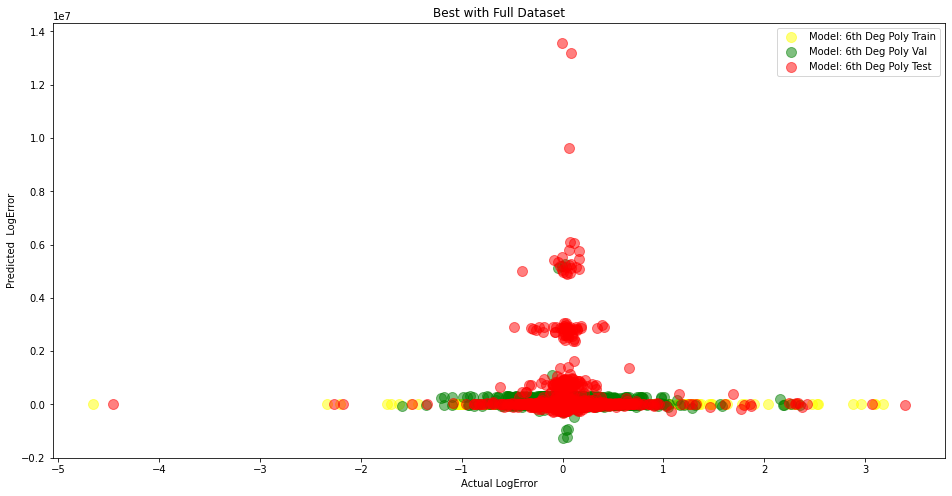

,Train,Validate,Test,Train_to_Val_diff,Train_to_Val_abs_diff,Train_to_Test_diff,Train_to_Test_abs_diff
RMSE for degree6 Polynomial Model,0.160203,162897.83089,483882.992801,-162897.670687,162897.670687,-483882.832598,483882.832598


In [43]:
LArmseDF=LATest(X_train,X_validate,X_test,y_train,y_validate,y_test)

LArmseDF

In [40]:


dbscan = DBSCAN(eps=0.123, min_samples = 2)
X_train['dbscan'] = dbscan.fit_predict(X_train[cols])
X_validate['dbscan'] = dbscan.fit_predict(X_validate[cols])
X_test['dbscan'] = dbscan.fit_predict(X_test[cols])
# kmeans_degree6 = pf6.transform(kmeans_degree6)



kmeans = KMeans(n_clusters=6)
X_train['kmeans'] = kmeans.fit_predict(X_train[cols])
X_validate['kmeans'] = kmeans.fit_predict(X_validate[cols])
X_test['kmeans'] = kmeans.fit_predict(X_test[cols])
# dbscan_degree6 = pf6.transform(dbscan_degree6)



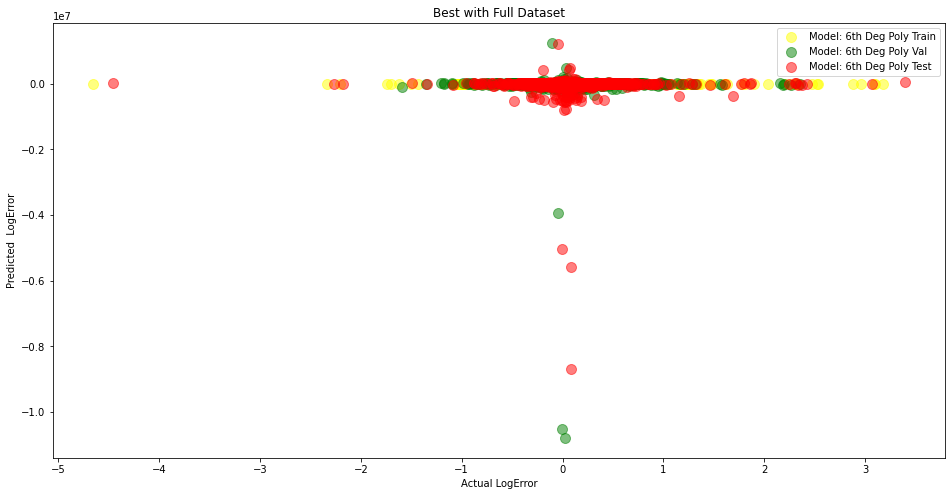

,Train,Validate,Test,Train_to_Val_diff,Train_to_Val_abs_diff,Train_to_Test_diff,Train_to_Test_abs_diff
RMSE for degree6 Polynomial Model,0.163895,178438.512845,149101.828389,-178438.348951,178438.348951,-149101.664494,149101.664494


In [41]:

dbclusterRSME=LATest(X_train[dbscancols],X_validate[dbscancols],X_test[dbscancols],y_train,y_validate,y_test)

dbclusterRSME




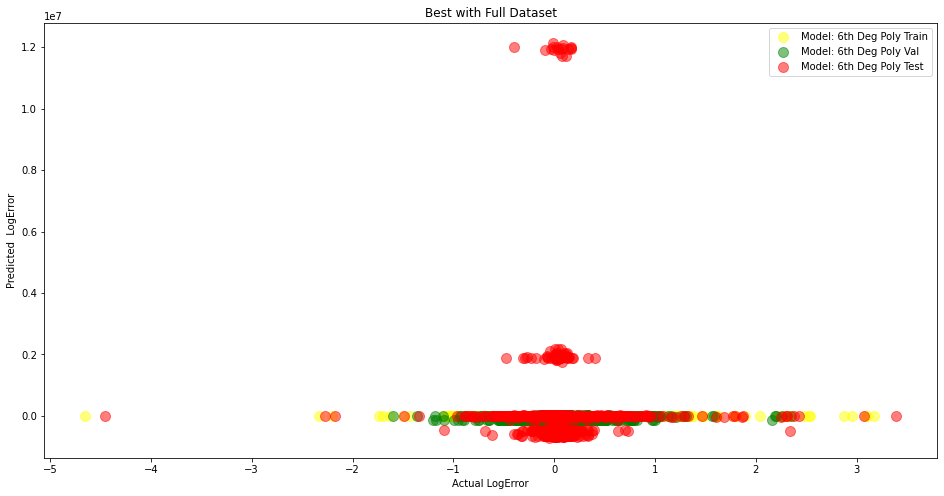

,Train,Validate,Test,Train_to_Val_diff,Train_to_Val_abs_diff,Train_to_Test_diff,Train_to_Test_abs_diff
RMSE for degree6 Polynomial Model,0.163892,58492.870665,663700.944781,-58492.706773,58492.706773,-663700.780889,663700.780889


In [42]:


KmeansclusterRSME=LATest(X_train[kmeanscols],X_validate[kmeanscols],X_test[kmeanscols],y_train,y_validate,y_test)

KmeansclusterRSME


# Conclusion:
## Cursory Cluster was not benifical caused what appears to be over fitting. Our models are likely overfit because it is a 6 Degree Polynomial. 

# With more time we would like to:

## We would like to work on optimizing our clustering algorithims. I would like to create better loop structures to find the optimal cluster sizes. 
***
---

### Steps to Reproduce
You need to copy our included files ending with .ipynb and .py. Then add a .env file with the format below.
```python

host='xxxxx'
username='xxxxxx'
password='xxxxxx'
## Where the strings are your respective credentials to the codeUp SQL server

```

For example:

1)You will need an env.py file that contains the hostname, username and password of the mySQL database that contains the titanic_db.passengers table. Store that env file locally in the repository.

2)clone my repo (including the wrangle.py, explore.py, and model.py) (confirm .gitignore is hiding your env.py file)

3)libraries used are pandas, matplotlib, seaborn, numpy, sklearn,scipy, math.

4)you should be able to run Similar Log Error Preditions.
